In [1]:
#cài đặt thư viện cần thiết
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install sklearn


In [2]:
#import thư viện
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [3]:
#lNạp file sales_data_sample.csv vào dataframe
df  = pd.read_csv('sales_data_sample.csv', encoding= 'unicode_escape')

#explore the data 
df.head()

df.shape 

df.describe()

df.info()

df.isnull().sum()

df.dtypes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ORDERNUMBER      2823 non-null   int64  
 1   QUANTITYORDERED  2823 non-null   int64  
 2   DEALSIZE         2823 non-null   object 
 3   PRICEEACH        2823 non-null   float64
 4   ORDERLINENUMBER  2823 non-null   int64  
 5   SALES            2823 non-null   float64
 6   ORDERDATE        2823 non-null   object 
 7   STATUS           2823 non-null   object 
 8   QTR_ID           2823 non-null   int64  
 9   MONTH_ID         2823 non-null   int64  
 10  YEAR_ID          2823 non-null   int64  
 11  PRODUCTLINE      2823 non-null   object 
 12  MSRP             2823 non-null   int64  
 13  RESULT           2823 non-null   object 
 14  PRODUCTCODE      2823 non-null   object 
 15  TERRITORY        1749 non-null   object 
 16  COUNTRY          2823 non-null   object 
 17  CITY          

ORDERNUMBER          int64
QUANTITYORDERED      int64
DEALSIZE            object
PRICEEACH          float64
ORDERLINENUMBER      int64
SALES              float64
ORDERDATE           object
STATUS              object
QTR_ID               int64
MONTH_ID             int64
YEAR_ID              int64
PRODUCTLINE         object
MSRP                 int64
RESULT              object
PRODUCTCODE         object
TERRITORY           object
COUNTRY             object
CITY                object
CUSTOMERID          object
CUSTOMERNAME        object
ADDRESSLINE1        object
dtype: object

In [4]:
df_drop  = ['ADDRESSLINE1','YEAR_ID','MONTH_ID','QTR_ID','MSRP','ORDERLINENUMBER','CUSTOMERID','STATUS','RESULT','CITY', 'TERRITORY','CUSTOMERNAME', 'ORDERNUMBER'] 
df = df.drop(df_drop, axis=1) #Bỏ các cột phân loại không cần thiết cùng với các cột có giá trị null. Không thể điền giá trị null vì có rất nhiều giá trị null.
df.isnull().sum()

df.dtypes



QUANTITYORDERED      int64
DEALSIZE            object
PRICEEACH          float64
SALES              float64
ORDERDATE           object
PRODUCTLINE         object
PRODUCTCODE         object
COUNTRY             object
dtype: object

In [5]:
# Kiểm tra các cột phân loại.
df['COUNTRY'].unique()


array(['USA', 'France', 'Norway', 'Australia', 'Finland', 'Austria', 'UK',
       'Spain', 'Sweden', 'Singapore', 'Canada', 'Japan', 'Italy',
       'Denmark', 'Belgium', 'Philippines', 'Germany', 'Switzerland',
       'Ireland'], dtype=object)

In [6]:
df['PRODUCTLINE'].unique()


array(['Motorcycles', 'Classic Cars', 'Trucks and Buses', 'Vintage Cars',
       'Planes', 'Ships', 'Trains'], dtype=object)

In [7]:
df['DEALSIZE'].unique()

array(['Small', 'Medium', 'Large'], dtype=object)

In [8]:
productline = pd.get_dummies(df['PRODUCTLINE']) #Chuyển đổi các cột phân loại.
Dealsize = pd.get_dummies(df['DEALSIZE'])

df = pd.concat([df,productline,Dealsize], axis = 1) # nổi các cột thể hiện produceline và dealsize

df_drop  = ['COUNTRY','PRODUCTLINE','DEALSIZE'] #Loại bỏ Country, PRODUCTLINE, DEALSIZE vì có rất nhiều quốc gia, dòng sản phẩm ...
df = df.drop(df_drop, axis=1)

df['PRODUCTCODE'] = pd.Categorical(df['PRODUCTCODE']).codes #Chuyển đổi kiểu dữ liệu.

df.drop('ORDERDATE', axis=1, inplace=True) #Dropping Ngày đặt hàng dưới dạng Tháng 

df.dtypes #Tất cả các kiểu dữ liệu được chuyển đổi thành số

QUANTITYORDERED       int64
PRICEEACH           float64
SALES               float64
PRODUCTCODE            int8
Classic Cars          uint8
Motorcycles           uint8
Planes                uint8
Ships                 uint8
Trains                uint8
Trucks and Buses      uint8
Vintage Cars          uint8
Large                 uint8
Medium                uint8
Small                 uint8
dtype: object

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

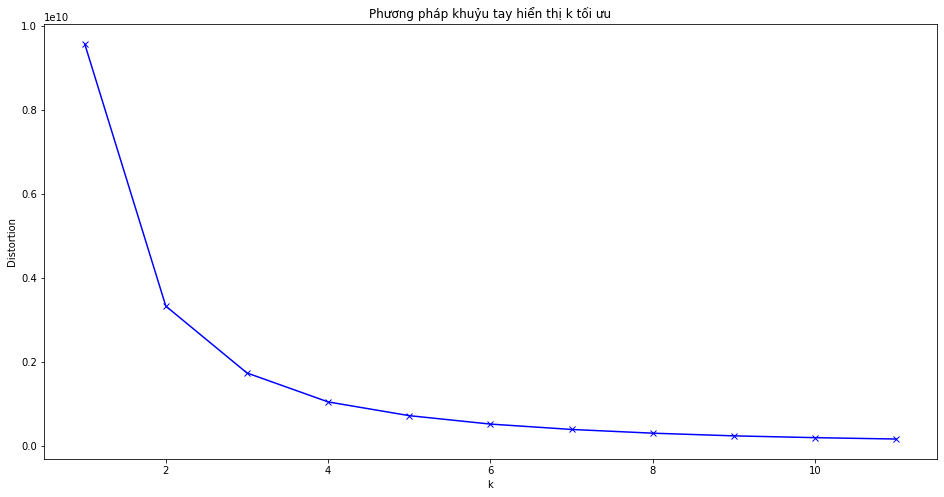

In [9]:
## Vẽ đồ thị Elbow để xác định số cụm.
distortions = [] #trung bình cộng bình phương khoảng cách giữa tâm cụm đến các điểm còn lại
K = range(1,12) # set khoảng K để  chạy vòng lặp
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)   #Áp dụng quán tính cho sự Biến dạng
    plt.figure(figsize=(16,8))

plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Phương pháp khuỷu tay hiển thị k tối ưu')
plt.show()


In [10]:
#Khi số k tăng độ méo, cong giảm.
#Quan sát: Có thể quan sát thấy một Elbow Khuỷu tay ở cụm 3 và sau đó đường cong giảm dần.
#Chọn số cụm bằng 3


In [11]:
#xây dựng mô hình K-means clustering
X_train = df.values #chuyển đổi dữ liệu từ dataframe df thành một mảng NumPy - Biến X_train chứa các giá trị đầu vào của dữ liệu.
X_train.shape   #kiểm tra kích thước của X_train để xác định số lượng mẫu và số lượng thuộc tính trong dữ liệu.

model = KMeans(n_clusters=3,random_state=2) #khởi tạo một mô hình K-means clustering với số cụm bằng 3

model = model.fit(X_train) #huấn luyện mô hình bằng cách sử dụng X_train và gán các điểm dữ liệu vào từng cụm tương ứng.
predictions = model.predict(X_train) #dự đoán cụm cho mỗi điểm dữ liệu trong X_train. Kết quả được lưu vào biến predictions.

unique,counts = np.unique(predictions,return_counts=True) # hàm np.unique để đếm số lượng phần tử duy nhất trong predictions và đếm số lần xuất hiện của mỗi phần tử. 

counts = counts.reshape(1,3)  #điều chỉnh kích thước của counts thành (1, 3), để có thể tạo một dataframe
counts_df = pd.DataFrame(counts,columns=['Cluster1','Cluster2','Cluster3'])#tạo một dataframe counts_df từ counts, với các cột được đặt tên là 'Cluster1', 'Cluster2', 'Cluster3'
                                                                           #Mỗi hàng trong dataframe đại diện cho số lượng mẫu được gán vào từng cụm
counts_df.head()

,Cluster1,Cluster2,Cluster3
0,1086,1364,373


In [12]:
## Visualization 
#sử dụng PCA (Phân tích thành phần chính) để giảm chiều dữ liệu ban đầu từ X_train thành chỉ 2 cột (PCA1 và PCA2) để dễ dàng hình dung và trực quan hóa dữ liệu

pca = PCA(n_components=2) #khởi tạo một đối tượng PCA với n_components=2,  giảm chiều dữ liệu ban đầu xuống còn 2 chiều
#Tạo DataFrame mới với tên cột là 'PCA1' và 'PCA2' 
reduced_X = pd.DataFrame(pca.fit_transform(X_train),columns=['PCA1','PCA2']) #phương thức .fit_transform() của đối tượng PCA để áp dụng phép biến đổi PCA lên X_train. Kết quả trả về là một mảng NumPy đã được giảm chiều thành 2 cột. 

reduced_X.head()

,PCA1,PCA2
0,-682.475486,-58.698880
1,-787.662298,-58.170756
2,330.842523,-51.807809
3,193.137915,-51.647142
4,1651.771870,-43.673536


array([[ 5.83947496e+02, -3.41757131e-01],
       [-1.43062574e+03,  6.41418528e-01],
       [ 3.54218680e+03, -1.35579887e+00]])

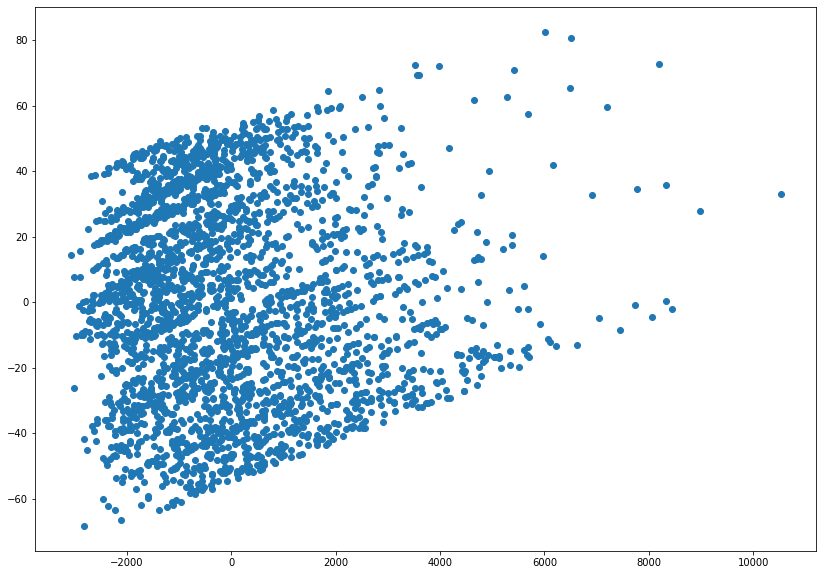

In [13]:
#Plotting the normal Scatter Plot
plt.figure(figsize=(14,10))
plt.scatter(reduced_X['PCA1'],reduced_X['PCA2'])

model.cluster_centers_ #Tìm trọng tâm. (Tổng cộng có 3 Centroid. Mỗi Array chứa một centroid cho tính năng cụ thể)

reduced_centers = pca.transform(model.cluster_centers_) #Chuyển đổi trọng tâm thành 3 theo tọa độ x và y

reduced_centers


,PCA1,PCA2,Clusters
0,-682.475486,-58.698880,1
1,-787.662298,-58.170756,1
2,330.842523,-51.807809,0
3,193.137915,-51.647142,0
4,1651.771870,-43.673536,0


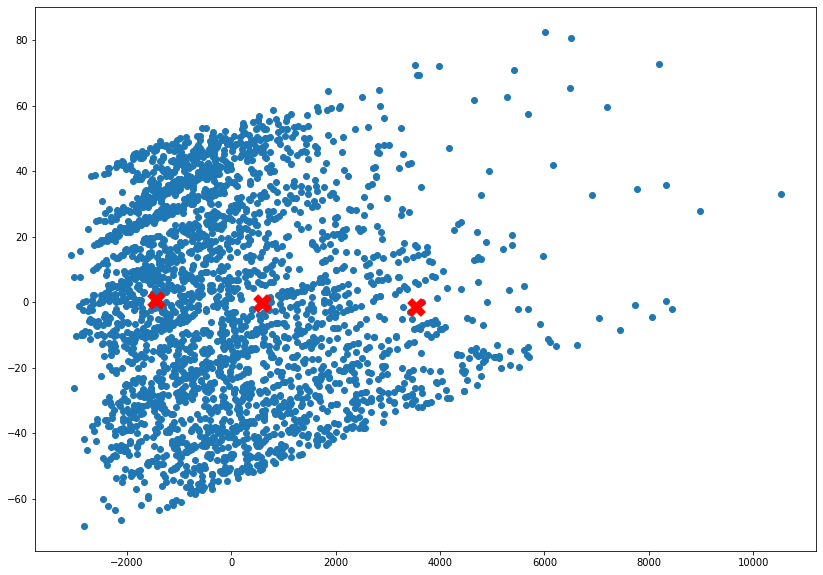

In [14]:

plt.figure(figsize=(14,10))
plt.scatter(reduced_X['PCA1'],reduced_X['PCA2'])
plt.scatter(reduced_centers[:,0],reduced_centers[:,1],color='red',marker='X',s=300) #Vẽ các centriods

reduced_X['Clusters'] = predictions ##Thêm các Cụm vào khung dữ liệu đã giảm.

reduced_X.head()

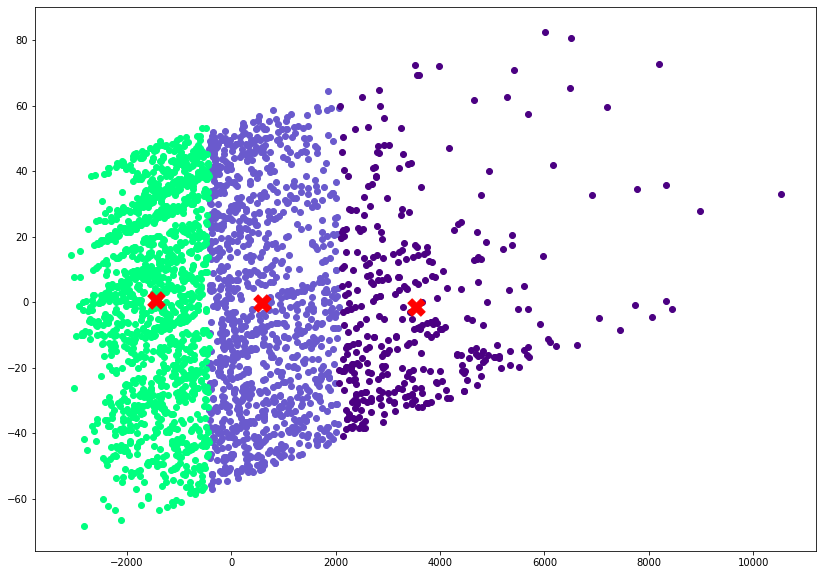

In [15]:
#Vẽ trực quan các cụm
plt.figure(figsize=(14,10))#Tạo một hình ảnh mới với kích thước (14, 10) để hiển thị scatter plot.

plt.scatter(reduced_X[reduced_X['Clusters'] == 0].loc[:,'PCA1'],reduced_X[reduced_X['Clusters'] == 0].loc[:,'PCA2'],color='slateblue')#Vẽ scatter plot cho các điểm dữ liệu trong cụm 0, với trục x là 'PCA1' và trục y là 'PCA2', sử dụng màu 'slateblue'.

plt.scatter(reduced_X[reduced_X['Clusters'] == 1].loc[:,'PCA1'],reduced_X[reduced_X['Clusters'] == 1].loc[:,'PCA2'],color='springgreen')#Vẽ scatter plot cho các điểm dữ liệu trong cụm 1, tương tự như trên, nhưng sử dụng màu 'springgreen'.

plt.scatter(reduced_X[reduced_X['Clusters'] == 2].loc[:,'PCA1'],reduced_X[reduced_X['Clusters'] == 2].loc[:,'PCA2'],color='indigo')#Vẽ scatter plot cho các điểm dữ liệu trong cụm 2, tương tự như trên, nhưng sử dụng màu 'indigo'.


plt.scatter(reduced_centers[:,0],reduced_centers[:,1],color='red',marker='X',s=300)#Vẽ các điểm biểu diễn tâm cụm (centers) trên biểu đồ, với màu 'black', ký hiệu là 'x' và kích thước 300.

In [16]:
#Dự đoán 1 bộ dữ liệu mới thuộc cụm nào?

#QUANTITYORDERED       int64
#PRICEEACH           float64
#SALES               float64
#PRODUCTCODE            int8
#Classic Cars          uint8
#Motorcycles           uint8
#Planes                uint8
#Ships                 uint8
#Trains                uint8
#Trucks and Buses      uint8
#Vintage Cars          uint8
#Large                 uint8
#Medium                uint8
#Small                 uint8 
#Căn cứ vào thông tin trên để nhập input phù hợp
predict_data = np.array([[30, 100, 2998, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1]])
new_data_cluster = model.predict(predict_data)

print("Bộ dữ liệu mới thuộc cụm:", new_data_cluster)

Bộ dữ liệu mới thuộc cụm: [1]


In [17]:
#Ghi kết quả vào file csv để lưu trữ
df_val =df.values
df.to_csv('check_ouput_data.csv', index=False)
print("completed !")

completed !
